# Kuis 1 Machine Learning
**Team 02 TI-3H**

<table>
  <tr>
    <th>Absen</th>
    <th>Nama</th>
    <th>NIM</th>
  </tr>

  <tr>
    <td>03</td>
    <td>Adinda Wahyu Luchmansyahvira</td>
    <td>2141720096</td>
  </tr>
    <tr>
    <td>04</td>
    <td>Alfan Olivan</td>
    <td>2141720078</td>
  </tr>
    <tr>
    <td>15</td>
    <td>Lukas Valentino</td>
    <td>2141720032</td>
  </tr>
    <tr>
    <td>17</td>
    <td>Mochamad Driya Ananta</td>
    <td>2141720224</td>
  </tr>
    <tr>
    <td>28</td>
    <td>Wiradarma Nurmagika Bagaskara</td>
    <td>2141720184</td>
  </tr>
  
  
</table>

## **Load MNIST Dataset**

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## **Check Imbalance Data**

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})




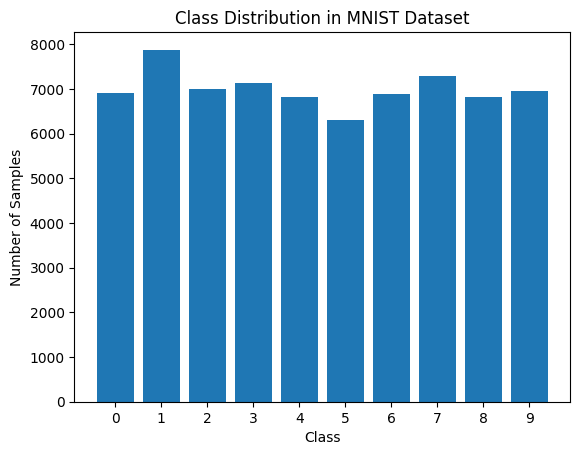

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)
print("\n")

# Convert class_counts to a list of counts for each class
counts = [class_counts[i] for i in range(10)]

# Define class labels
class_labels = [str(i) for i in range(10)]

# Create a bar chart
plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

In [7]:
# Calculate Class Imbalance Ratios
class_ratios = {class_label: count / len(y) for class_label, count in class_counts.items()}
# Print Class Distribution Statistics
print("Class Distribution in MNIST Dataset:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples ({class_ratios[class_label]*100:.2f}% of total)")

# Find the Imbalanced Classes (if any)
imbalanced_classes = [class_label for class_label, ratio in class_ratios.items() if ratio < 0.05]
if len(imbalanced_classes) > 0:
    print("Imbalanced Classes:", imbalanced_classes)
else:
    print("The dataset is approximately balanced.")

Class Distribution in MNIST Dataset:
Class 5: 6313 samples (9.02% of total)
Class 0: 6903 samples (9.86% of total)
Class 4: 6824 samples (9.75% of total)
Class 1: 7877 samples (11.25% of total)
Class 9: 6958 samples (9.94% of total)
Class 2: 6990 samples (9.99% of total)
Class 3: 7141 samples (10.20% of total)
Class 6: 6876 samples (9.82% of total)
Class 7: 7293 samples (10.42% of total)
Class 8: 6825 samples (9.75% of total)
The dataset is approximately balanced.


## **Print 15 First Images**

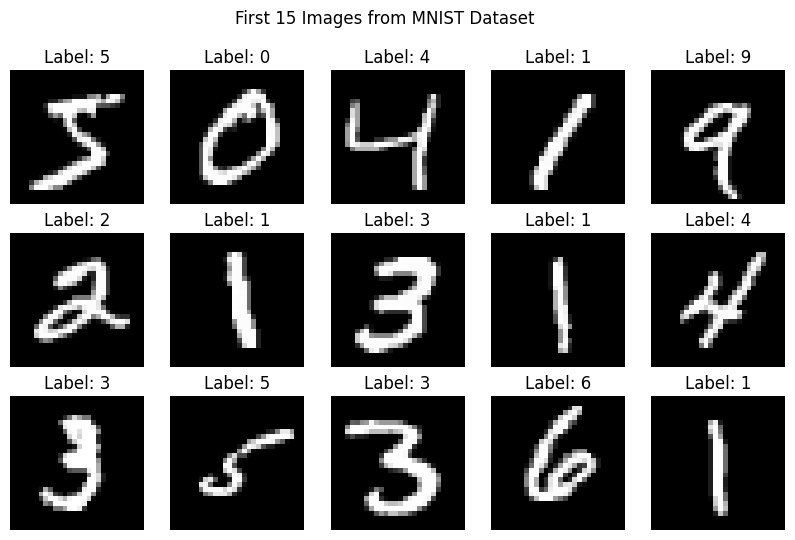

In [8]:
# Create a subplot with 3 rows and 5 columns to display the images

# Convert x to a NumPy array
x_convert = x.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns, and i+1-th subplot
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 15 Images from MNIST Dataset')
plt.show()

## **Feature Extraction Using HOG And PCA**

In [65]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Extract HOG features and HOG images from the input images
def extract_hog_features_and_images(images):
    hog_features = []
    hog_images = []

    for image in images:
        # Reshape the image to its original shape (28x28)
        image = image.reshape((28, 28))

        # Calculate HOG features
        hog_feature, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

        hog_features.append(hog_feature)
        hog_images.append(hog_image)

    return np.array(hog_features), np.array(hog_images)

# PCA Using Scikit-Learn
pca_100 = PCA(n_components=100)

## **Gaussian Naive Bayes Algorithm**

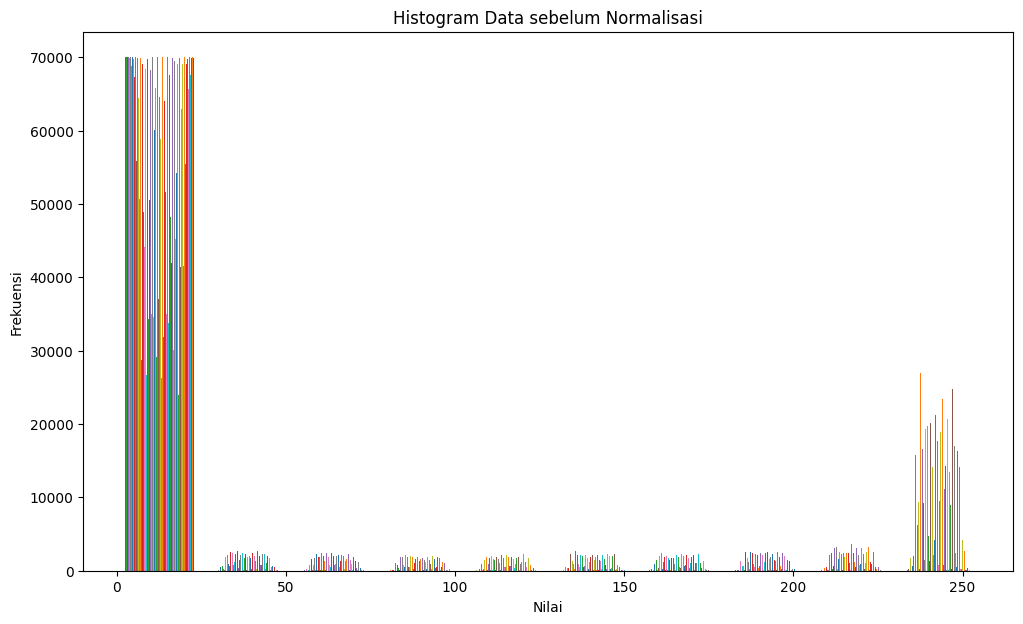

In [14]:
# Create Histogram for dataset

plt.figure(figsize=(12,7))
plt.hist(x)
plt.title("Histogram Data sebelum Normalisasi")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

(70000, 784)


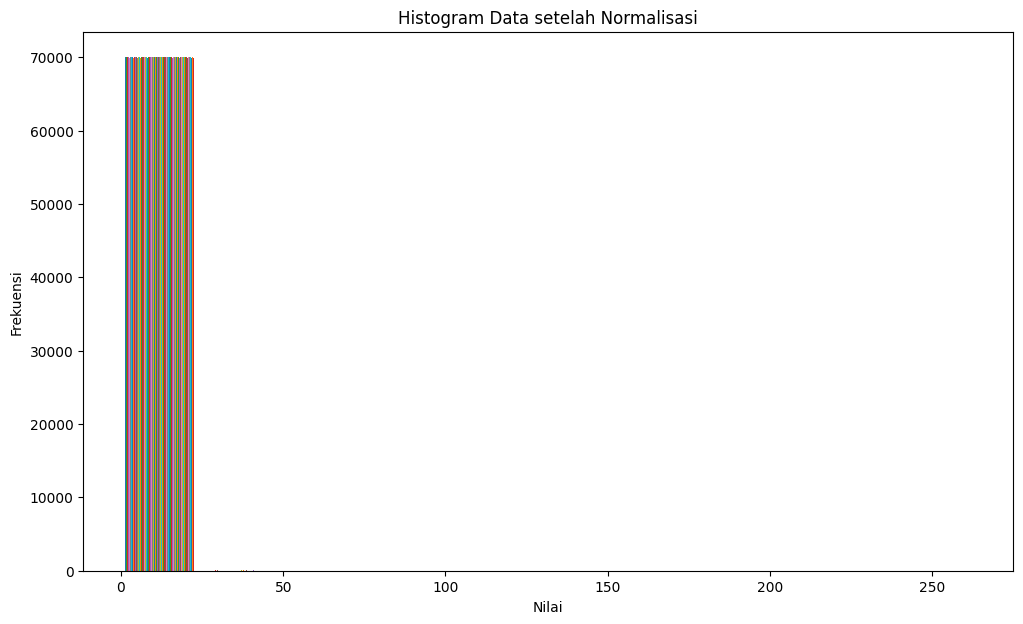

In [18]:
# Data Preprocessing using StandardScaler
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

plt.figure(figsize=(12,7))
plt.hist(standardized_data)
plt.title("Histogram Data setelah Normalisasi")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Feature Extraction using pca for standardized data
x_pca_gnb = pca_100.fit_transform(standardized_data)

# Split data into training and test sets
x_train_pca_gnb, x_test_pca_gnb, y_train_pca_gnb, y_test_pca_gnb = train_test_split(x_pca_gnb, y, test_size=0.3)

# Train model
model_gnb = GaussianNB()
model_gnb.fit(x_train_pca_gnb,y_train_pca_gnb)
# Make predictions on the training set
y_train_pred_pca_gnb = model_gnb.predict(x_train_pca_gnb)

# Calculate the accuracy on the training set
accuracy_train_pca_gnb = accuracy_score(y_train_pca_gnb, y_train_pred_pca_gnb)
print(f"Accuracy on Training Set GNB PCA(n_components=100): {accuracy_train_pca_gnb*100:.2f}%")

# Make predictions on the test set
y_test_pred_pca_gnb = model_gnb.predict(x_test_pca_gnb)

# Calculate the accuracy on the test set
accuracy_test_pca_gnb = accuracy_score(y_test_pca_gnb, y_test_pred_pca_gnb)
print(f"Accuracy on Test Set Set GNB PCA(n_components=100): {accuracy_test_pca_gnb*100:.2f}%")

Accuracy on Training Set GNB PCA(n_components=100): 58.95%
Accuracy on Test Set Set GNB PCA(n_components=100): 59.09%


Confusion Matrix on GNB PCA(n_components=100):


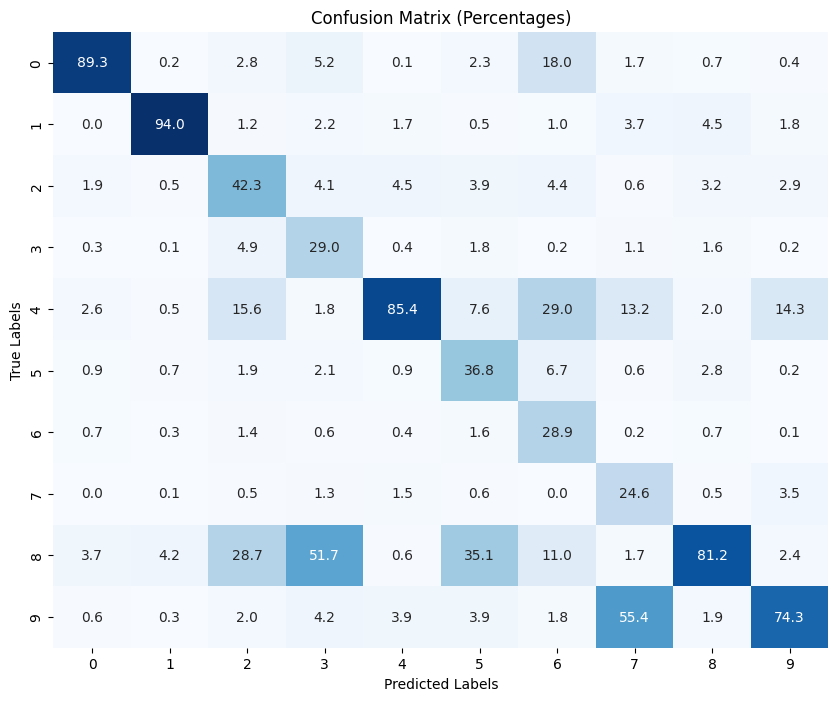

In [20]:
# Confusion Matrix for the Training Set & Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print the confusion matrix on the training set
print("Confusion Matrix on GNB PCA(n_components=100):")
SVM_PCA_Matrix = confusion_matrix(y_train_pca_gnb, y_train_pred_pca_gnb)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## **Multinomial Naive Bayes**

In [24]:
from sklearn.naive_bayes import MultinomialNB

# Split data into training and test sets
x_train_mnb, x_test_mnb, y_train_mnb, y_test_mnb = train_test_split(x, y, test_size=0.1)

# Train model
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_mnb,y_train_mnb)
# Make predictions on the training set
y_train_pred_mnb = nb_classifier.predict(x_train_mnb)

# Calculate the accuracy on the training set
accuracy_train_mnb = accuracy_score(y_train_mnb, y_train_pred_mnb)
print(f"Accuracy on Training Set MNB: {accuracy_train_mnb*100:.2f}%")

# Make predictions on the test set
y_test_pred_mnb = nb_classifier.predict(x_test_mnb)

# Calculate the accuracy on the test set
accuracy_test_mnb = accuracy_score(y_test_mnb, y_test_pred_mnb)
print(f"Accuracy on Test Set Set MNB: {accuracy_test_mnb*100:.2f}%")

Accuracy on Training Set MNB: 82.62%
Accuracy on Test Set Set MNB: 83.40%


Confusion Matrix on Multinomial Naive Bayes:


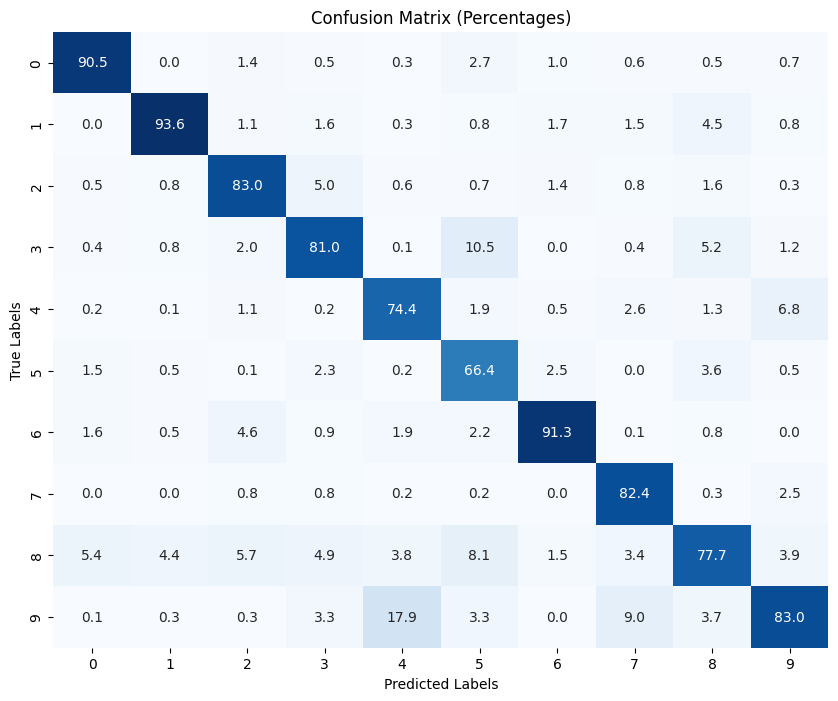

In [27]:
# Confusion Matrix for the Training Set & Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print the confusion matrix on the training set
print("Confusion Matrix on Multinomial Naive Bayes:")
SVM_PCA_Matrix = confusion_matrix(y_train_mnb, y_train_pred_mnb)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## **SVM (Support Vector Machine)**

In [66]:
from sklearn.svm import SVC

# Convert x to a NumPy array
x_convert = x.values.astype(int)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_convert, y, test_size=0.2, random_state=42)

# Extract HOG features and HOG images for the training set
hog_features_train, hog_images_train = extract_hog_features_and_images(x_train)

# Extract HOG features and HOG images for the testing set
hog_features_test, hog_images_test = extract_hog_features_and_images(x_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the SVM classifier on the HOG features
svm_classifier.fit(hog_features_train, y_train)

# Make predictions on the training set
y_train_pred_rbf_hog = svm_classifier.predict(hog_features_train)

# Calculate the accuracy on the training set
accuracy_train_rbf_hog = accuracy_score(y_train, y_train_pred_rbf_hog)
print(f"Accuracy on Training Set SVM(rbf) HOG: {accuracy_train_rbf_hog*100:.2f}%")

# Make predictions on the test set
y_test_pred_rbf_hog = svm_classifier.predict(hog_features_test)

# Calculate the accuracy on the test set
accuracy_test_rbf_hog = accuracy_score(y_test, y_test_pred_rbf_hog)
print(f"Accuracy on Test Set SVM(rbf) HOG: {accuracy_test_rbf_hog*100:.2f}%")

Accuracy on Training Set SVM(rbf) HOG: 98.25%
Accuracy on Test Set SVM(rbf) HOG: 97.09%


Confusion Matrix on SVM:


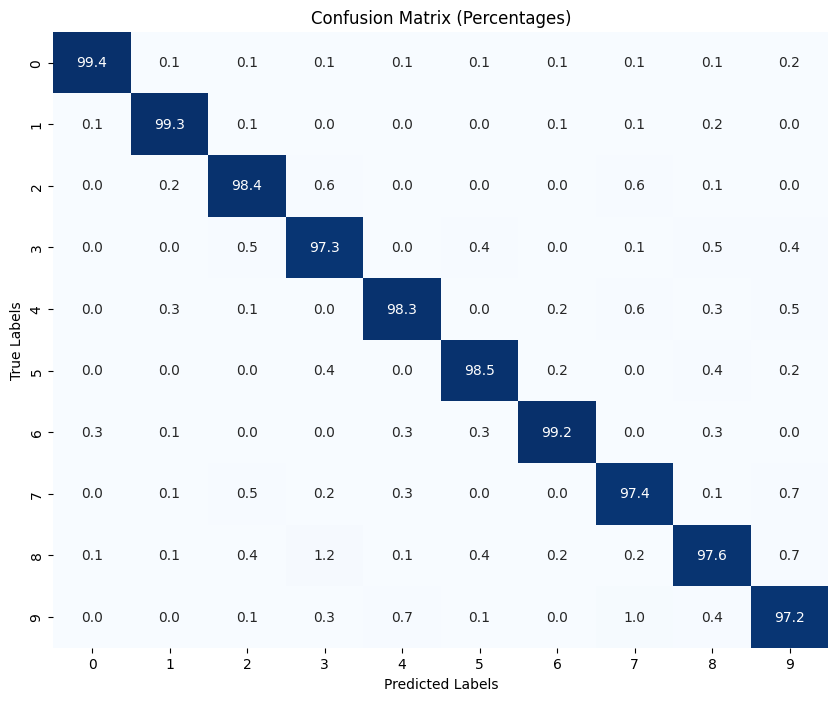

In [32]:
# Confusion Matrix for the Training Set & Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print the confusion matrix on the training set
print("Confusion Matrix on SVM:")
SVM_PCA_Matrix = confusion_matrix(y_train, y_train_pred_rbf_hog)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## **Print Images With True & Predicted Labels**

- Multinomial Naive Bayes

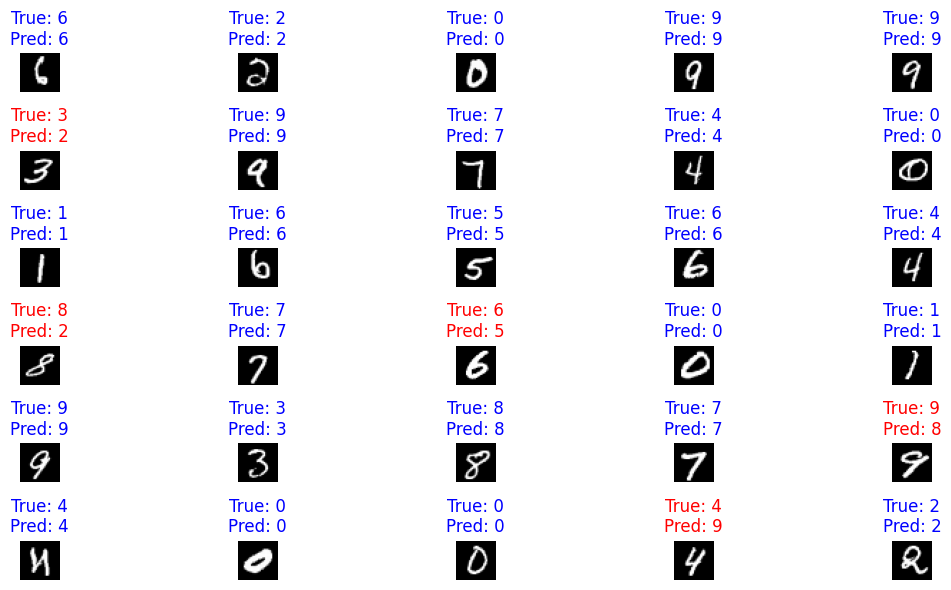

In [39]:
import pandas as pd

n_samples_to_display = 30
plt.figure(figsize=(12, 6))

for i in range(n_samples_to_display):
    plt.subplot(6, 5, (i + 1))
    plt.imshow(x_test_mnb.iloc[i].values.reshape(28, 28), cmap="gray")

    true_label = y_test_mnb.iloc[i] if isinstance(y_test_mnb, pd.Series) else y_test_mnb.iloc[i]
    pred_label = y_test_pred_mnb.iloc[i] if isinstance(y_test_pred_mnb, pd.Series) else y_test_pred_mnb[i]

    if true_label == pred_label:
        text_color = 'blue'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

- SVM

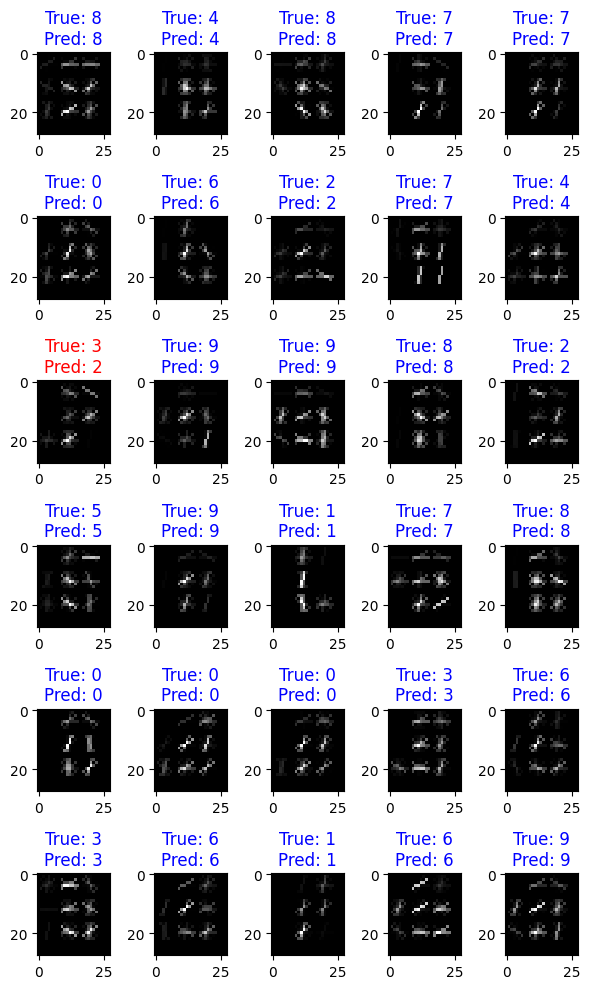

In [80]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

n_samples_to_display = 30

plt.figure(figsize=(6, 10))  # Adjust the figsize for the entire figure

for i in range(n_samples_to_display):
    plt.subplot(6, 5, (i + 1))

    # Display an individual HOG image in a larger size
    plt.imshow(hog_images_test[i], cmap=plt.cm.gray, aspect='auto', interpolation='nearest')

    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_test_pred_rbf_hog[i] if isinstance(y_test_pred_rbf_hog, pd.Series) else y_test_pred_rbf_hog[i]

    if true_label == pred_label:
        text_color = 'blue'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)

plt.tight_layout()
plt.show()


## **Conclusion**

**1. Gaussian Naive Bayes (GNB) with PCA (n_components=100):**

Accuracy on Training Set: 58.95%

Accuracy on Test Set: 59.09%

The GNB model with PCA-based dimensionality reduction (100 components) achieved relatively low accuracy scores on both the training and test sets. This suggests that the GNB model may not be the best choice for this dataset, and the PCA feature reduction may not have been particularly effective in this case.

**2. Multinomial Naive Bayes (MNB):**

Accuracy on Training Set: 82.62%

Accuracy on Test Set: 83.40%

The Multinomial Naive Bayes model achieved higher accuracy scores compared to GNB with PCA. It performs reasonably well on both the training and test sets. This suggests that the MNB model is a better choice for this dataset than GNB with PCA, and the data may have a multinomial distribution that aligns with the model's assumptions.

**3. Support Vector Machine (SVM) with RBF Kernel and HOG Features:**

Accuracy on Training Set: 98.25%

Accuracy on Test Set: 97.09%

The SVM model with an RBF kernel and HOG features achieved very high accuracy scores on both the training and test sets. These results suggest that the SVM model is an excellent choice for this dataset when using HOG features. The high accuracy on the test set indicates good generalization, meaning the model is likely capturing meaningful patterns in the data.

In summary, based on the accuracy results:

The SVM model with an RBF kernel and HOG features outperforms both GNB with PCA and MNB in terms of accuracy.
Multinomial Naive Bayes performs reasonably well, especially considering its simplicity.
Gaussian Naive Bayes with PCA dimensionality reduction appears to be the least effective model for this dataset.